In [136]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [137]:
def floatCheck(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

with open("data/Merged.csv") as f:
    data = csv.reader(f)
    data = np.array(list(data))
headers = list(data[0][1:-1])
data = data[1:, 1:]
data = [[float(x) if floatCheck(x) else np.nan for x in row] for row in data]
data = [[x/row[-1] if i > 5 else x for i, x in enumerate(row[:-1])] for row in data]
headers = ["VA", "PV", "GE", "RQ", "RL", "CC", "Tests", "Deaths", "Cases", "Vaccinated", "Fully Vaxed"]
print(headers)

['VA', 'PV', 'GE', 'RQ', 'RL', 'CC', 'Tests', 'Deaths', 'Cases', 'Vaccinated', 'Fully Vaxed']


In [138]:
lenHeaders = len(headers)
data = np.asarray([row for row in data if not any(np.isnan(x) for x in row)])
print(data)

[[0.554      0.6        0.25       ... 0.06967546 0.73132171 0.33450577]
 [0.1875     0.8        0.75       ... 0.07427713 2.156776   0.88401388]
 [0.62875    0.55       0.375      ... 0.11692869 1.51021825 0.65461136]
 ...
 [0.63375    0.65       0.625      ... 0.04957552 0.42940376 0.24252017]
 [0.4305     0.55       0.25       ... 0.01110929 0.05742967 0.03655978]
 [0.18925    0.2        0.         ... 0.00896736 0.43999236 0.18755022]]


In [139]:
# df = pd.Series()
columns = data.T
X_train, X_test, y_train, y_test = train_test_split(data[:, 1:], columns[1], test_size=0.2)
clf = Lasso(alpha=1)
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)


0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [140]:
clf = Ridge(alpha=1)
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)

0.8334187098643636
[ 5.98718793e-01  1.61489613e-02  7.16110989e-02  8.92732587e-02
  7.69910321e-02  3.00700753e-04 -5.47322419e-04 -3.36595544e-02
 -5.25552832e-03  2.03941370e-02]


In [141]:
clf = LinearRegression()
clf.fit(X_train, y_train)
r_squared = r2_score(clf.predict(X_test), y_test)
print(r_squared)
print(clf.coef_)

1.0
[ 1.00000000e+00 -9.52628919e-17 -8.82786594e-17 -6.88558178e-18
  7.95702140e-17 -2.17435542e-16  5.06430193e-16 -6.35034643e-17
  2.82172434e-17  3.32605582e-17]


In [142]:
ridgeSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = Ridge(alpha=1)
    clf.fit(X_train, y_train)
    ridgeSimRow = [ridgeSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            ridgeSimRow.append(0)
        elif x < 6 and i < 5:
            ridgeSimRow.append(0)
        elif x <= i:
            ridgeSimRow.append(abs(coefs[i]))
        else:
            ridgeSimRow.append(ridgeSimMatrix[i+1][x])
    ridgeSimMatrix.append(ridgeSimRow)
for i in range(lenHeaders+1):
    ridgeSimMatrix[i].insert(i, 1)
ridgeMatrixFramed = pd.DataFrame(ridgeSimMatrix)
print(ridgeMatrixFramed)

             0         1         2         3         4         5         6   \
0             1        VA        PV        GE        RQ        RL        CC   
1            VA         1         0         0         0         0         0   
2            PV         0         1         0         0         0         0   
3            GE         0         0         1         0         0         0   
4            RQ         0         0         0         1         0         0   
5            RL         0         0         0         0         1         0   
6            CC         0         0         0         0         0         1   
7         Tests  0.004815  0.000508  0.008242  0.003424  0.011543  0.000716   
8        Deaths  0.003191  0.001976  0.000627  0.002518  0.000750  0.003198   
9         Cases  0.111253  0.103619  0.013795  0.037847  0.005277  0.030515   
10   Vaccinated  0.012836  0.024331  0.069537  0.025775  0.029429  0.015007   
11  Fully Vaxed  0.022387  0.051804  0.007899  0.109

In [154]:
lassoSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = Lasso(alpha=0.005)
    clf.fit(X_train, y_train)
    lassoSimRow = [lassoSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            lassoSimRow.append(0)
        elif x < 6 and i < 5:
            lassoSimRow.append(0)
        elif x <= i:
            lassoSimRow.append(abs(coefs[i]))
        else:
            lassoSimRow.append(lassoSimMatrix[i+1][x])
    lassoSimMatrix.append(lassoSimRow)
for i in range(lenHeaders+1):
    lassoSimMatrix[i].insert(i, 1)
lassoMatrixFramed = pd.DataFrame(lassoSimMatrix)
print(lassoMatrixFramed)

             0         1         2         3         4         5         6   \
0             1        VA        PV        GE        RQ        RL        CC   
1            VA         1         0         0         0         0         0   
2            PV         0         1         0         0         0         0   
3            GE         0         0         1         0         0         0   
4            RQ         0         0         0         1         0         0   
5            RL         0         0         0         0         1         0   
6            CC         0         0         0         0         0         1   
7         Tests  0.003676  0.001465  0.005627  0.011079  0.006134  0.000315   
8        Deaths  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9         Cases  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10   Vaccinated  0.000000  0.051962  0.073211  0.025901  0.042327  0.000000   
11  Fully Vaxed  0.000000  0.000000  0.000000  0.000

In [144]:
linRegSimMatrix = [headers.copy()]
for x in range(lenHeaders):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray([row for i,row in enumerate(columns) if i!=x]).T, columns[x], test_size=0.2)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    linRegSimRow = [linRegSimMatrix[0][x]]
    coefs = list(clf.coef_)
    for i in range(lenHeaders-1):
        if x > 5 and i > 5:
            linRegSimRow.append(0)
        elif x < 6 and i < 5:
            linRegSimRow.append(0)
        elif x <= i:
            linRegSimRow.append(abs(coefs[i]))
        else:
            linRegSimRow.append(linRegSimMatrix[i+1][x])
    linRegSimMatrix.append(linRegSimRow)
for i in range(lenHeaders+1):
    linRegSimMatrix[i].insert(i, 1)
linRegMatrixFramed = pd.DataFrame(linRegSimMatrix)
print(linRegMatrixFramed)

             0          1         2         3          4          5   \
0             1         VA        PV        GE         RQ         RL   
1            VA          1         0         0          0          0   
2            PV          0         1         0          0          0   
3            GE          0         0         1          0          0   
4            RQ          0         0         0          1          0   
5            RL          0         0         0          0          1   
6            CC          0         0         0          0          0   
7         Tests   0.003426  0.002939  0.000845   0.005111   0.008728   
8        Deaths  28.714004  0.209623  6.885397  26.099614  13.633578   
9         Cases   0.061938  0.552095  0.054570   0.127130   0.230629   
10   Vaccinated   0.016013  0.067662  0.101047   0.170954   0.017706   
11  Fully Vaxed   0.164757  0.081477  0.132658   0.439889   0.140460   

           6         7          8         9           10       

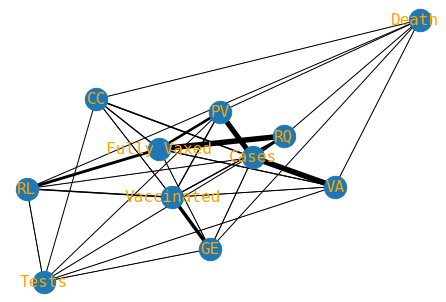

In [145]:
adjMatrix = [[x*50 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(ridgeSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
long_edges = list(filter(lambda e: e[2] == 0, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=16, font_family='monospace', font_color="orange")
plt.show()

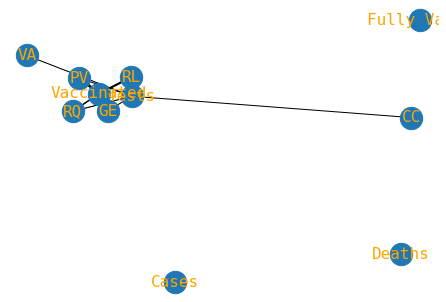

In [156]:
adjMatrix = [[x*50 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(lassoSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
long_edges = list(filter(lambda e: e[2] == 0, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=16, font_family='monospace', font_color="orange")
plt.show()

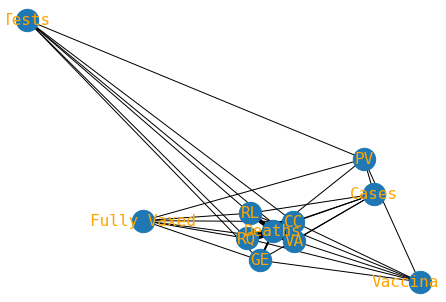

In [151]:
adjMatrix = [[x*0.3 if i < j else 0 for j, x in enumerate(row)] for i, row in enumerate(np.asarray(linRegSimMatrix)[1:, 1:].astype(np.float))]
G = nx.from_numpy_matrix(np.matrix(adjMatrix))

layout = nx.spring_layout(G)
lab_node = dict(zip(G.nodes, headers))
long_edges = list(filter(lambda e: e[2] == 0, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)
nx.draw(G, layout)
nx.draw_networkx_nodes(G, layout, node_size=500)
widths = list(nx.get_edge_attributes(G, "weight").values())
nx.draw_networkx_edges(G, layout, width=widths)
nx.draw_networkx_labels(G, layout, labels=lab_node, font_size=16, font_family='monospace', font_color="orange")
plt.show()